# DFT Geometry Optimization and AMBER panels for creatinine [M+Na]+

In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import os
from os.path import *
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from scipy.stats import gaussian_kde

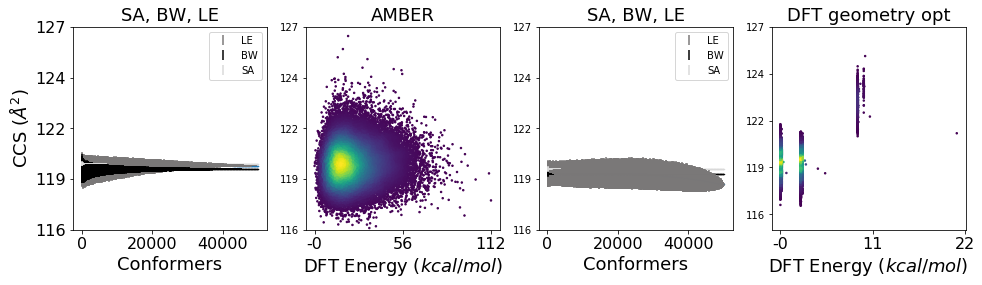

In [6]:
N = 50000

for i, ID in enumerate(['11']):

    # Set global figure
    plt.figure(figsize=(16,4))
    
    
    
    ####------------
    # Plot CCS vs DFT energy. We plot this first in the script so we
     # can grab the y axis limits
    ax2 = plt.subplot(1,4,2)
    MD = pd.read_csv(f'../data/molid{ID}_ccs.csv')   
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which apparently is meaningless to compare to each other
    MD['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    MD['dft_energy'] -= MD['dft_energy'].min()
    
    # Generate color by density
    x = MD['dft_energy']
    y = MD['ccs']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    #z = 'black'

    plt.scatter(x, y, c=z, s=2.2)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=18)
    #plt.title(f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$', fontsize=18)
    plt.title('AMBER', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax2.set_xticks(xtic)   
    
    # Define the y limits
    ymin = np.min([y.min(), y.min()])
    ymax = np.max([y.max(), y.max()])
    plt.ylim(ymin, ymax)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))      
    
    
    
    
    
    ####------------
    # Plot BW, LE, SA on AMBER
    ax1 = plt.subplot(1,4,1)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='none', ecolor='#7a7878', label='LE') #545454

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#000000', label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='none', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#d9d9d9', label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='none', ecolor='#d9d9d9', label='SA')
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    plt.ylabel('CCS ($\AA^2$)', fontsize=18)
    #plt.title(f'{names[i]}, molid{ID}')
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend()
    
    #ax1.set_yticks(ytic)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))     
    
    
    
    
    ####------------
    # Plot BW, LE, SA on DFT-GO
    ax3 = plt.subplot(1,4,3)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_dgo_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='none', ecolor='#7a7878', label='LE')

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#000000', label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='none', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#d9d9d9', label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='none', ecolor='#d9d9d9', label='SA')
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.legend()    
    
    #ax3.set_yticks(ytic)
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.0f')) 
    
        
    ####------------
    # Plot CCS vs DFT energy for DFT GO (geom opt)
    ax4 = plt.subplot(1,4,4)
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    DGO = pd.read_csv(f'../data/molid{ID}_dgo_ccs.csv')      
    DGO['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    DGO['dft_energy'] -= DGO['dft_energy'].min()
    x4 = DGO['dft_energy']
    y4 = DGO['ccs']    
    
    xy4 = np.vstack([x4,y4])
    z = gaussian_kde(xy4)(xy4)
    #z = 'black'

    plt.scatter(x4, y4, c=z, s=2.2)
    plt.ylim(ymin-1, ymax)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=18)
    plt.title('DFT geometry opt', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x4)-0.01, np.max(x4)+1, 3)
    ax4.set_xticks(xtic)    
    #ax4.set_yticks(ytic)
    ax4.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))     
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

    # Set the ytics
    ytic = np.linspace(DGO['ccs'].min()-0.5, MD['ccs'].max()+0.5, 5)
    
    ax1.set_yticks(ytic)
    ax2.set_yticks(ytic)
    ax3.set_yticks(ytic)
    ax4.set_yticks(ytic)
    
    
    #plt.tight_layout() #bad, stretches things.
    plt.gcf().subplots_adjust(bottom=0.175)
    #plt.savefig('creatinine-4panel.png', dpi=600, bbox='tight')
    plt.show()

